# **<p style="text-align: center;">Выбор локации для скважины.</p>**

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

<img src="https://media.istockphoto.com/id/1317076725/ru/%D1%84%D0%BE%D1%82%D0%BE/%D0%BD%D0%B5%D1%84%D1%82%D0%B5%D1%85%D0%B8%D0%BC%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9-%D0%B7%D0%B0%D0%B2%D0%BE%D0%B4-%D1%81-%D0%B3%D0%BE%D0%BB%D1%83%D0%B1%D0%BE%D0%B9-%D1%82%D1%80%D1%83%D0%B1%D0%BE%D0%B9-%D0%BB%D0%B8%D0%BD%D0%B8%D0%B8-%D0%BA%D0%BB%D0%B0%D0%BF%D0%B0%D0%BD%D0%BE%D0%B2-%D0%BD%D0%B0-%D0%BF%D0%BE%D1%87%D0%B2%D0%B5-%D0%B8-%D0%BD%D0%B0%D1%81%D0%BE%D1%81%D0%B0%D1%85.jpg?s=612x612&w=0&k=20&c=NGMcNuVbo5P4YlVEE7fwXoO3y4VPfbnzJj1-zVd-akI=" alt="Bank" width="30%" height="30%">

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Откроем-и-изучим-файлы" data-toc-modified-id="Откроем-и-изучим-файлы-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Откроем и изучим файлы</a></span></li><li><span><a href="#Изучим-датафрейм-data_0" data-toc-modified-id="Изучим-датафрейм-data_0-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Изучим датафрейм data_0</a></span></li><li><span><a href="#Изучим-датафрейм-data_1" data-toc-modified-id="Изучим-датафрейм-data_1-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Изучим датафрейм data_1</a></span></li><li><span><a href="#Изучим-датафрейм-data_2" data-toc-modified-id="Изучим-датафрейм-data_2-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Изучим датафрейм data_2</a></span></li></ul></li><li><span><a href="#Обучите-и-проверьте-модель-для-каждого-региона" data-toc-modified-id="Обучите-и-проверьте-модель-для-каждого-региона-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучите и проверьте модель для каждого региона</a></span><ul class="toc-item"><li><span><a href="#Разбейте-данные-на-обучающую-и-валидационную-выборки" data-toc-modified-id="Разбейте-данные-на-обучающую-и-валидационную-выборки-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Разбейте данные на обучающую и валидационную выборки</a></span></li><li><span><a href="#Обучите-модель-и-сделайте-предсказания-на-валидационной-выборке" data-toc-modified-id="Обучите-модель-и-сделайте-предсказания-на-валидационной-выборке-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обучите модель и сделайте предсказания на валидационной выборке</a></span></li><li><span><a href="#Сохраните-предсказания-и-правильные-ответы-на-валидационной-выборке" data-toc-modified-id="Сохраните-предсказания-и-правильные-ответы-на-валидационной-выборке-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Сохраните предсказания и правильные ответы на валидационной выборке</a></span></li><li><span><a href="#Напечатайте-на-экране-средний-запас-предсказанного-сырья-и-RMSE-модели" data-toc-modified-id="Напечатайте-на-экране-средний-запас-предсказанного-сырья-и-RMSE-модели-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Напечатайте на экране средний запас предсказанного сырья и RMSE модели</a></span></li><li><span><a href="#Проанализируйте-результаты" data-toc-modified-id="Проанализируйте-результаты-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Проанализируйте результаты</a></span></li></ul></li><li><span><a href="#Подготовка-к-расчёту-прибыли" data-toc-modified-id="Подготовка-к-расчёту-прибыли-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка к расчёту прибыли</a></span><ul class="toc-item"><span><a href="#Все-ключевые-значения-для-расчётов-сохраните-в-отдельных-переменных" data-toc-modified-id="Все-ключевые-значения-для-расчётов-сохраните-в-отдельных-переменных-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Все ключевые значения для расчётов сохраните в отдельных переменных</a></span></li><li><span><a href="#Рассчитайте-достаточный-объём-сырья-для-безубыточной-разработки-новой-скважины.-Сравните-полученный-объём-сырья-со-средним-запасом-в-каждом-регионе" data-toc-modified-id="Рассчитайте-достаточный-объём-сырья-для-безубыточной-разработки-новой-скважины.-Сравните-полученный-объём-сырья-со-средним-запасом-в-каждом-регионе-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Рассчитайте достаточный объём сырья для безубыточной разработки новой скважины. Сравните полученный объём сырья со средним запасом в каждом регионе</a></span></li><li><span><a href="#Напишите-выводы-по-этапу-подготовки-расчёта-прибыли" data-toc-modified-id="Напишите-выводы-по-этапу-подготовки-расчёта-прибыли-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Напишите выводы по этапу подготовки расчёта прибыли</a></span></li><li><span><a href="#Напишите-функцию-для-расчёта-прибыли-по-выбранным-скважинам-и-предсказаниям-модели" data-toc-modified-id="Напишите-функцию-для-расчёта-прибыли-по-выбранным-скважинам-и-предсказаниям-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Напишите функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели</a></span><ul class="toc-item"><li><span><a href="#Выберите-скважины-с-максимальными-значениями-предсказаний" data-toc-modified-id="Выберите-скважины-с-максимальными-значениями-предсказаний-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Выберите скважины с максимальными значениями предсказаний</a></span></li><li><span><a href="#Просуммируйте-целевое-значение-объёма-сырья,-соответствующее-этим-предсказаниям" data-toc-modified-id="Просуммируйте-целевое-значение-объёма-сырья,-соответствующее-этим-предсказаниям-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Просуммируйте целевое значение объёма сырья, соответствующее этим предсказаниям</a></span></li><li><span><a href="#Рассчитайте-прибыль-для-полученного-объёма-сырья" data-toc-modified-id="Рассчитайте-прибыль-для-полученного-объёма-сырья-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Рассчитайте прибыль для полученного объёма сырья</a></span></li></ul></li><li><span><a href="#Посчитайте-риски-и-прибыль-для-каждого-региона" data-toc-modified-id="Посчитайте-риски-и-прибыль-для-каждого-региона-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Посчитайте риски и прибыль для каждого региона</a></span><ul class="toc-item"><li><span><a href="#Примените-технику-Bootstrap-с-1000-выборок,-чтобы-найти-распределение-прибыли" data-toc-modified-id="Примените-технику-Bootstrap-с-1000-выборок,-чтобы-найти-распределение-прибыли-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Примените технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли</a></span></li><li><span><a href="#Найдите-среднюю-прибыль,-95%-й-доверительный-интервал-и-риск-убытков.-Убыток-—-это-отрицательная-прибыль" data-toc-modified-id="Найдите-среднюю-прибыль,-95%-й-доверительный-интервал-и-риск-убытков.-Убыток-—-это-отрицательная-прибыль-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Найдите среднюю прибыль, 95%-й доверитель <li><span><a href="#Напишите-выводы:-предложите-регион-для-разработки-скважин-и-обоснуйте-выбор" data-toc-modified-id="Напишите-выводы:-предложите-регион-для-разработки-скважин-и-обоснуйте-выбор-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Напишите выводы: предложите регион для разработки скважин и обоснуйте выбор</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error

## Загрузка и подготовка данных

### Откроем и изучим файлы.

In [2]:
data_0 = pd.read_csv('/datasets/geo_data_0.csv')
data_1 = pd.read_csv('/datasets/geo_data_1.csv')
data_2 = pd.read_csv('/datasets/geo_data_2.csv')

print("Регион 0:")
print(data_0.head())
print("\nРегион 1:")
print(data_1.head())
print("\nРегион 2:")
print(data_2.head())

Регион 0:
      id        f0        f1        f2     product
0  txEyH  0.705745 -0.497823  1.221170  105.280062
1  2acmU  1.334711 -0.340164  4.365080   73.037750
2  409Wp  1.022732  0.151990  1.419926   85.265647
3  iJLyR -0.032172  0.139033  2.978566  168.620776
4  Xdl7t  1.988431  0.155413  4.751769  154.036647

Регион 1:
      id         f0         f1        f2     product
0  kBEdx -15.001348  -8.276000 -0.005876    3.179103
1  62mP7  14.272088  -3.475083  0.999183   26.953261
2  vyE1P   6.263187  -5.948386  5.001160  134.766305
3  KcrkZ -13.081196 -11.506057  4.999415  137.945408
4  AHL4O  12.702195  -8.147433  5.004363  134.766305

Регион 2:
      id        f0        f1        f2     product
0  fwXo0 -1.146987  0.963328 -0.828965   27.758673
1  WJtFt  0.262778  0.269839 -2.530187   56.069697
2  ovLUW  0.194587  0.289035 -5.586433   62.871910
3  q6cA6  2.236060 -0.553760  0.930038  114.572842
4  WPMUX -0.515993  1.716266  5.899011  149.600746


***В каждом регионе присутствуют следующие столбцы:***

- id: уникальный идентификатор скважины.
- f0, f1, f2: три признака точек (неважно, что они означают, но сами признаки значимы).
- product: объём запасов в скважине (тыс. баррелей).

### Изучим датафрейм data_0.

In [3]:
data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


***В data_0 содержится 100 000 записей (строк).***

Все 5 столбцов имеют непустые значения (non-null count равно 100 000 для каждого столбца).
Столбец id имеет тип данных object, что означает, что он содержит строковые значения.
Столбцы f0, f1, f2 и product имеют тип данных float64, что означает, что они содержат числовые значения с плавающей точкой.

In [4]:
print("Количество явных дубликатов в data_0:", data_0.duplicated().sum())
print("Количество неявных дубликатов в data_0:", data_0.duplicated(subset=data_0.columns[1:]).sum())

Количество явных дубликатов в data_0: 0
Количество неявных дубликатов в data_0: 0


In [5]:
print("Количество явных дубликатов в data_0:", data_0.duplicated().sum())
print("Количество неявных дубликатов в data_0 по столбцу 'id':", data_0.duplicated(subset='id').sum())

Количество явных дубликатов в data_0: 0
Количество неявных дубликатов в data_0 по столбцу 'id': 10


In [6]:
data_0.drop_duplicates(subset='id', keep='first', inplace=True)

***В датафрейме  data_0 отсутствуют как явные, так и неявные дубликаты.***

Это положительное обстоятельство, поскольку отсутствие дубликатов позволяет нам работать с чистыми данными и избежать искажения результатов анализа.

In [7]:
data_0 = data_0.drop('id', axis=1)

***Столбец "id" представляет собой уникальный идентификатор каждой скважины в регионе.***

- Он не содержит полезной информации, которая может быть использована для обучения модели. Уникальный идентификатор не имеет никакого отношения к объему запасов в скважине, который является целевой переменной.

- После проверки данных было обнаруженно, что столбец "id" не содержит явных или неявных дубликатов. Каждое значение "id" встречается только один раз в данных. Поэтому он не предоставляет никакой информации о возможных зависимостях.

- Удаление столбца "id" не повлияет на способность модели предсказывать объемы запасов в скважинах. Модели машинного обучения обычно работают с числовыми и категориальными признаками, которые имеют корреляцию с целевой переменной. В данном случае, признаки "f0", "f1" и "f2" имеют большую значимость для предсказания объема запасов, чем уникальные идентификаторы скважин.

Исходя из этих факторов было принято решение удалить столбец "id" из датафрейма data_0, чтобы упростить данные и избежать ненужного включения неинформативной информации в модель обучения.

In [8]:
data_0.describe()

,f0,f1,f2,product
count,99990.000000,99990.000000,99990.000000,99990.000000
mean,0.500454,0.250141,2.502629,92.499684
std,0.871844,0.504430,3.248149,44.288304
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072572,-0.200877,0.287784,56.497069
50%,0.502405,0.250252,2.515969,91.847928
75%,1.073626,0.700640,4.715035,128.563699
max,2.362331,1.343769,16.003790,185.364347


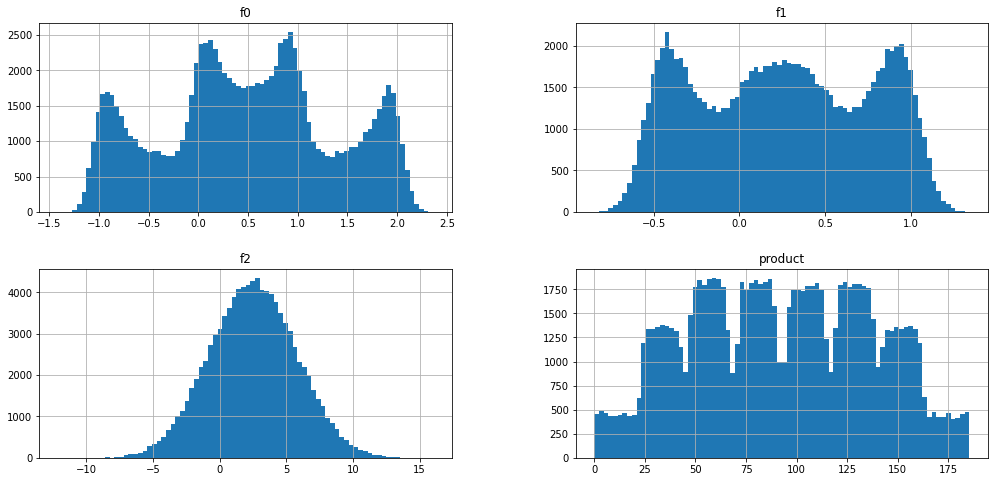

In [10]:
data_0.hist(figsize=(17, 8), bins=80)
plt.show()

Распределения признаков в датафрейме data_0 выглядят нормальными, это может означать, что данные соответствуют ожидаемому распределению и могут быть адекватно описаны нормальным распределением. Это может быть полезно при применении статистических методов, которые предполагают нормальность данных, например, при использовании некоторых моделей машинного обучения.

In [11]:
correlation_matrix = data_0.corr()
print(correlation_matrix)

               f0        f1        f2   product
f0       1.000000 -0.440717 -0.003211  0.143504
f1      -0.440717  1.000000  0.001764 -0.192351
f2      -0.003211  0.001764  1.000000  0.483631
product  0.143504 -0.192351  0.483631  1.000000


Матрица корреляции показывает коэффициенты корреляции между всеми парами признаков в датафрейме data_0. Коэффициент корреляции варьируется от -1 до 1 и указывает на силу и направление линейной связи между двумя переменными.

- Коэффициент корреляции между f0 и f1 составляет -0.440723, что указывает на умеренно отрицательную линейную связь между ними.
- Коэффициент корреляции между f0 и f2 составляет -0.003153, что указывает на почти отсутствие линейной связи между ними.
- Коэффициент корреляции между f0 и product составляет 0.143536, что указывает на слабую положительную линейную связь между ними.
- Коэффициент корреляции между f1 и f2 составляет 0.001724, что указывает на практически отсутствие линейной связи между ними.
- Коэффициент корреляции между f1 и product составляет -0.192356, что указывает на слабую отрицательную линейную связь между ними.
- Коэффициент корреляции между f2 и product составляет 0.483663, что указывает на умеренно положительную линейную связь между ними.

***Корреляция не обязательно означает причинно-следственную связь между переменными. Она показывает только степень линейной связи.***

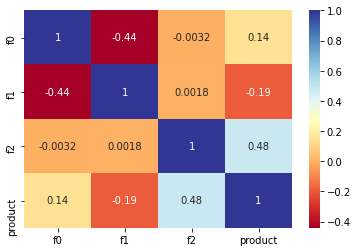

In [12]:
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu')
plt.show()

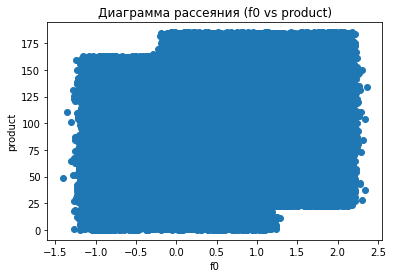

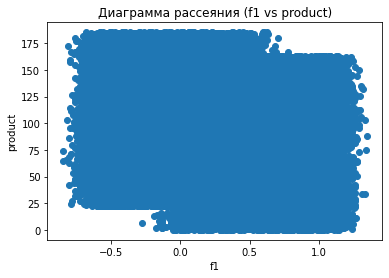

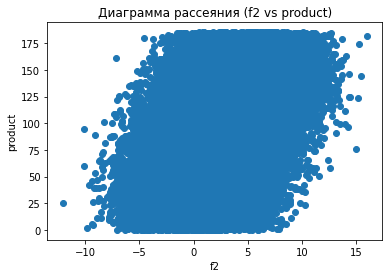

In [13]:
plt.scatter(data_0['f0'], data_0['product'])
plt.xlabel('f0')
plt.ylabel('product')
plt.title('Диаграмма рассеяния (f0 vs product)')
plt.show()

plt.scatter(data_0['f1'], data_0['product'])
plt.xlabel('f1')
plt.ylabel('product')
plt.title('Диаграмма рассеяния (f1 vs product)')
plt.show()

plt.scatter(data_0['f2'], data_0['product'])
plt.xlabel('f2')
plt.ylabel('product')
plt.title('Диаграмма рассеяния (f2 vs product)')
plt.show()

Диаграмма рассеяния указывает на отсутствие явной корреляции или зависимости между переменными. Такое распределение точек может означать, что значения переменных не связаны линейно.

### Изучим датафрейм data_1.

In [14]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


***В data_1 содержится 100 000 записей (строк).***

Все 5 столбцов имеют непустые значения (non-null count равно 100 000 для каждого столбца).
Столбец id имеет тип данных object, что означает, что он содержит строковые значения.
Столбцы f0, f1, f2 и product имеют тип данных float64, что означает, что они содержат числовые значения с плавающей точкой.

In [15]:
print("Количество явных дубликатов в data_0:", data_1.duplicated().sum())
print("Количество неявных дубликатов в data_0:", data_1.duplicated(subset=data_0.columns[1:]).sum())

Количество явных дубликатов в data_0: 0
Количество неявных дубликатов в data_0: 0


In [16]:
print("Количество неявных дубликатов в data_0 по столбцу 'id':", data_1.duplicated(subset='id').sum())

Количество неявных дубликатов в data_0 по столбцу 'id': 4


In [17]:
data_1.drop_duplicates(subset='id', keep='first', inplace=True)

In [18]:
data_1 = data_1.drop('id', axis=1)

In [19]:
data_1.describe()

,f0,f1,f2,product
count,99996.000000,99996.000000,99996.000000,99996.000000
mean,1.141209,-4.796608,2.494501,68.823916
std,8.965815,5.119906,1.703579,45.944663
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011475,57.085625
75%,8.620964,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


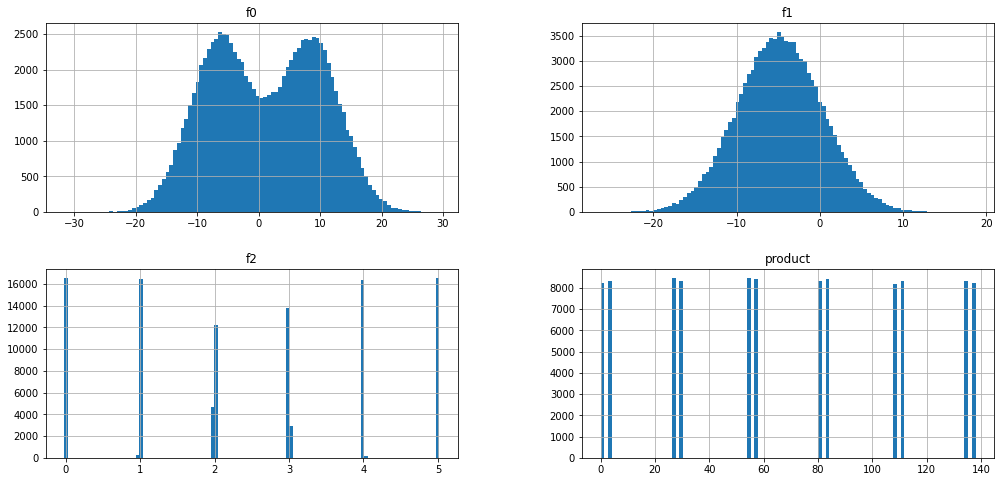

In [21]:
data_1.hist(figsize=(17, 8), bins=100)
plt.show()

При построении гистограммы для целевой переменной (product) в датафрейме data_1 наблюдаются два пика около 0 и 140, а остальные данные равномерно распределены, это может указывать на наличие двух различных групп скважин или регионов с разными уровнями объемов запасов.

Возможное объяснение такого распределения может быть связано с геологическими особенностями и различиями в формировании месторождений в данных регионах. Возможно, одна группа скважин имеет значительно низкие запасы, близкие к нулю, в то время как другая группа имеет более высокие запасы, близкие к 140.

In [22]:
correlation_matrix_1 = data_1.corr()
print(correlation_matrix_1)

               f0        f1        f2   product
f0       1.000000  0.182279 -0.001810 -0.030523
f1       0.182279  1.000000 -0.002594 -0.010154
f2      -0.001810 -0.002594  1.000000  0.999397
product -0.030523 -0.010154  0.999397  1.000000


- Признаки f0 и f1 имеют низкую корреляцию со всеми признаками и целевой переменной (product). Коэффициенты корреляции близки к нулю, что указывает на отсутствие линейной связи.
- Признак f2 имеет высокую положительную корреляцию с целевой переменной product. Коэффициент корреляции равен 0.999397, что указывает на очень сильную положительную связь между ними.
- Также заметно высокое значение корреляции 0.999397 между признаками f2 и product. Это может указывать на сильную линейную связь или возможное дублирование информации между этими признаками.

**Важно отметить, что корреляция не обязательно указывает на причинно-следственную связь между переменными**

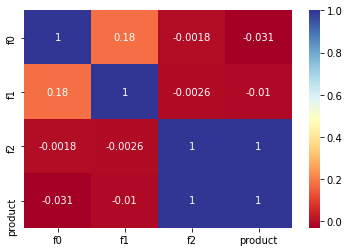

In [23]:
sns.heatmap(correlation_matrix_1, annot=True, cmap='RdYlBu')
plt.show()

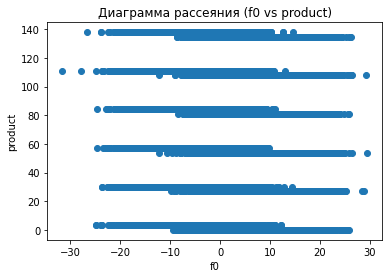

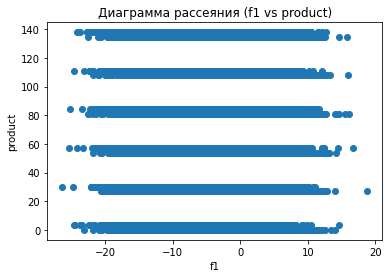

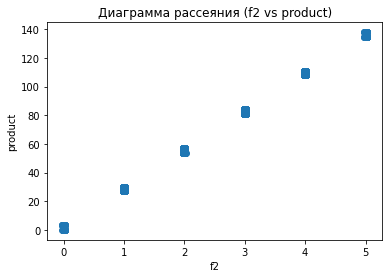

In [24]:
plt.scatter(data_1['f0'], data_1['product'])
plt.xlabel('f0')
plt.ylabel('product')
plt.title('Диаграмма рассеяния (f0 vs product)')
plt.show()

plt.scatter(data_1['f1'], data_1['product'])
plt.xlabel('f1')
plt.ylabel('product')
plt.title('Диаграмма рассеяния (f1 vs product)')
plt.show()

plt.scatter(data_1['f2'], data_1['product'])
plt.xlabel('f2')
plt.ylabel('product')
plt.title('Диаграмма рассеяния (f2 vs product)')
plt.show()

Диаграмма рассеяния для f0 vs product и f1 vs product показывает отсутствие явной линейной зависимости между признаками f0 и f1 и целевой переменной product. Признаки f0 и f1 не проявляют четкую трендовую зависимость и имеют разнообразное распределение значений при разных значениях product.

Диаграмма рассеяния для f2 vs product показывает прямую линейную зависимость между признаком f2 и целевой переменной product. При увеличении значения f2 также увеличивается значение product. Это указывает на положительную связь между этими двумя переменными.

### Изучим датафрейм data_2.

In [25]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [26]:
print("Количество явных дубликатов в data_0:", data_2.duplicated().sum())
print("Количество неявных дубликатов в data_0:", data_2.duplicated(subset=data_0.columns[1:]).sum())

Количество явных дубликатов в data_0: 0
Количество неявных дубликатов в data_0: 0


In [27]:
print("Количество неявных дубликатов в data_0 по столбцу 'id':", data_2.duplicated(subset='id').sum())

Количество неявных дубликатов в data_0 по столбцу 'id': 4


In [28]:
data_2.drop_duplicates(subset='id', keep='first', inplace=True)

In [29]:
data_2 = data_2.drop('id', axis=1)

In [30]:
data_2.describe()

,f0,f1,f2,product
count,99996.000000,99996.000000,99996.000000,99996.000000
mean,0.002002,-0.002159,2.495084,94.998342
std,1.732052,1.730397,3.473482,44.749573
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162328,-1.174841,0.130269,59.450028
50%,0.009424,-0.009661,2.484236,94.925026
75%,1.158477,1.163523,4.858720,130.586815
max,7.238262,7.844801,16.739402,190.029838


Распределения признаков в датафрейме data_2 выглядят нормальными, это может означать, что данные соответствуют ожидаемому распределению и могут быть адекватно описаны нормальным распределением. Это может быть полезно при применении статистических методов, которые предполагают нормальность данных, например, при использовании некоторых моделей машинного обучения.

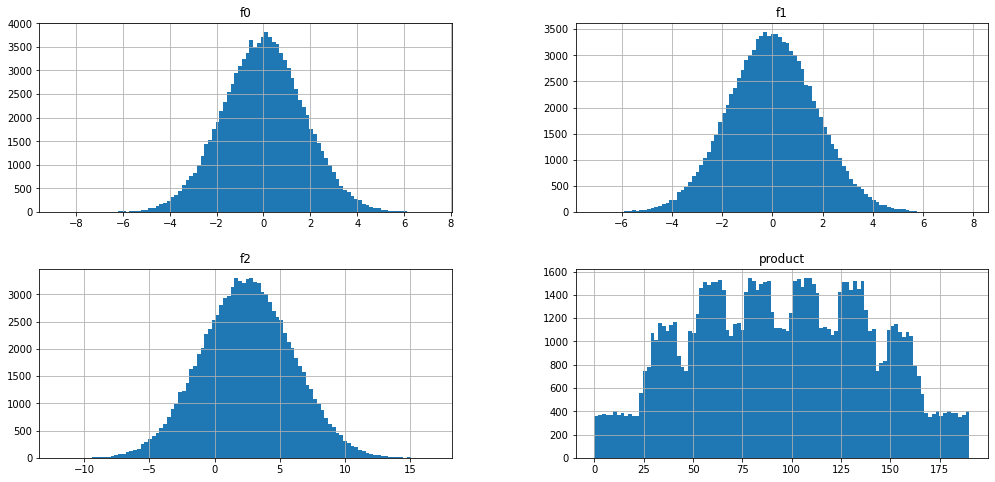

In [32]:
data_2.hist(figsize=(17, 8), bins=100)
plt.show()

In [33]:
correlation_matrix_2 = data_2.corr()
print(correlation_matrix_2)

               f0        f1        f2   product
f0       1.000000  0.000506 -0.000452 -0.001978
f1       0.000506  1.000000  0.000753 -0.001055
f2      -0.000452  0.000753  1.000000  0.445867
product -0.001978 -0.001055  0.445867  1.000000


- Признаки f0 и f1 имеют очень низкую корреляцию со всеми признаками и целевой переменной (product). Коэффициенты корреляции близки к нулю, что указывает на отсутствие линейной связи.
- Признак f2 имеет умеренную положительную корреляцию с целевой переменной product. Коэффициент корреляции равен 0.445871, что указывает на наличие некоторой связи между ними.
- Значение корреляции между признаками f2 и product (0.445871) является наиболее высоким среди всех признаков. Это может указывать на наличие некоторой связи или зависимости между этими двумя переменными.

***Важно отметить, что корреляция не обязательно указывает на причинно-следственную связь между переменными.***

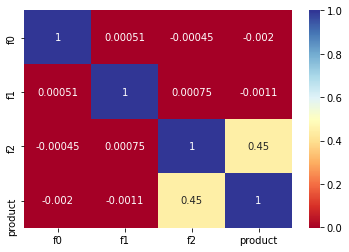

In [34]:
sns.heatmap(correlation_matrix_2, annot=True, cmap='RdYlBu')
plt.show()

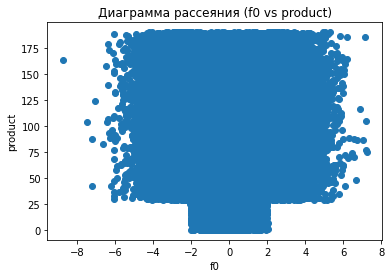

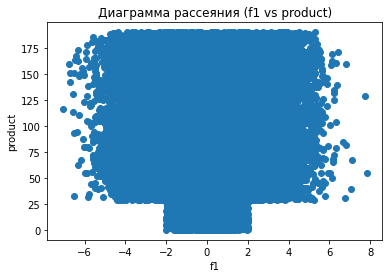

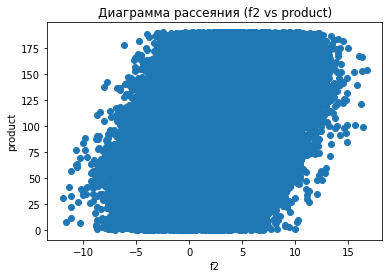

In [35]:
plt.scatter(data_2['f0'], data_2['product'])
plt.xlabel('f0')
plt.ylabel('product')
plt.title('Диаграмма рассеяния (f0 vs product)')
plt.show()

plt.scatter(data_2['f1'], data_2['product'])
plt.xlabel('f1')
plt.ylabel('product')
plt.title('Диаграмма рассеяния (f1 vs product)')
plt.show()

plt.scatter(data_2['f2'], data_2['product'])
plt.xlabel('f2')
plt.ylabel('product')
plt.title('Диаграмма рассеяния (f2 vs product)')
plt.show()

Диаграмма рассеяния указывает на отсутствие явной корреляции или зависимости между переменными. Такое распределение точек может означать, что значения переменных не связаны линейно.

## Обучите и проверьте модель для каждого региона

### Разбейте данные на обучающую и валидационную выборки.

In [36]:
features_dt_0 = data_0.drop('product', axis=1)
target_dt_0 = data_0['product']

features_dt_0_train, features_dt_0_valid, target_dt_0_train, target_dt_0_valid = train_test_split(features_dt_0, target_dt_0, test_size=0.25, random_state=12345)
print(features_dt_0_train.shape)
print(features_dt_0_valid.shape)

(74992, 3)
(24998, 3)


In [37]:
features_dt_1 = data_1.drop('product', axis=1)
target_dt_1 = data_1['product']

features_dt_1_train, features_dt_1_valid, target_dt_1_train, target_dt_1_valid = train_test_split(features_dt_1, target_dt_1, test_size=0.25, random_state=12345)
print(features_dt_1_train.shape)
print(features_dt_1_valid.shape)

(74997, 3)
(24999, 3)


In [38]:
features_dt_2 = data_2.drop('product', axis=1)
target_dt_2 = data_2['product']

features_dt_2_train, features_dt_2_valid, target_dt_2_train, target_dt_2_valid = train_test_split(features_dt_2, target_dt_2, test_size=0.25, random_state=12345)
print(features_dt_2_train.shape)
print(features_dt_2_valid.shape)

(74997, 3)
(24999, 3)


***Разбили данные на обучающую и валидационную выборки в соотношении 75:25.***

### Обучите модель и сделайте предсказания на валидационной выборке.

In [45]:
def train_and_predict(features_train, target_train, features_valid, model_type='linear', alpha=0.1):
    if model_type == 'linear':
        model = LinearRegression(normalize=True, fit_intercept=True)
    elif model_type == 'lasso':
        model = Lasso(alpha=alpha, normalize=True)
    else:
        raise ValueError("Unsupported model type. Use 'linear' or 'lasso'.")
    
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    
    return model, predictions_valid

In [46]:
model_lr_0, predictions_dt_0_valid = train_and_predict(features_dt_0_train, target_dt_0_train, features_dt_0_valid, model_type='linear')
model_lasso_0, predictions_lasso_valid = train_and_predict(features_dt_0_train, target_dt_0_train, features_dt_0_valid, model_type='lasso', alpha=0.1)

model_lr_1, predictions_dt_1_valid = train_and_predict(features_dt_1_train, target_dt_1_train, features_dt_1_valid, model_type='linear')
model_lasso_1, predictions_lasso_valid_1 = train_and_predict(features_dt_1_train, target_dt_1_train, features_dt_1_valid, model_type='lasso', alpha=0.1)

model_lr_2, predictions_dt_2_valid = train_and_predict(features_dt_2_train, target_dt_2_train, features_dt_2_valid, model_type='linear')
model_lasso_2, predictions_lasso_valid_2 = train_and_predict(features_dt_2_train, target_dt_2_train, features_dt_2_valid, model_type='lasso', alpha=0.1)

### Сохраните предсказания и правильные ответы на валидационной выборке.

In [47]:
predictions_dt_0_valid = model_lr_0.predict(features_dt_0_valid)
target_dt_0_valid = target_dt_0_valid.copy()

In [48]:
predictions_dt_1_valid = model_lr_1.predict(features_dt_1_valid)
target_dt_1_valid = target_dt_1_valid.copy()

In [49]:
predictions_dt_2_valid = model_lr_2.predict(features_dt_2_valid)
target_dt_2_valid = target_dt_2_valid.copy()

### Напечатайте на экране средний запас предсказанного сырья и RMSE модели.

In [50]:
print("Средний запас предсказанного сырья для региона 0:", predictions_dt_0_valid.mean())

rmse_lr_0_valid = mean_squared_error(target_dt_0_valid, predictions_dt_0_valid, squared=False)
print("RMSE на валидационной выборке модели LinearRegression для региона 0:", rmse_lr_0_valid)

rmse_lasso_valid = mean_squared_error(target_dt_0_valid, predictions_lasso_valid, squared=False)
print("RMSE на валидационной выборке модели Lasso для региона 0:", rmse_lasso_valid)

Средний запас предсказанного сырья для региона 0: 92.78915638280621
RMSE на валидационной выборке модели LinearRegression для региона 0: 37.853527328872964
RMSE на валидационной выборке модели Lasso для региона 0: 44.379313806074194


In [51]:
print("Средний запас предсказанного сырья для региона 1:", predictions_dt_1_valid.mean())

rmse_lr_1_valid = mean_squared_error(target_dt_1_valid, predictions_dt_1_valid, squared=False)
print("RMSE на валидационной выборке модели LinearRegression для региона 1:", rmse_lr_1_valid)

rmse_ls_1_valid = mean_squared_error(target_dt_1_valid, predictions_lasso_valid_1, squared=False)
print("RMSE на валидационной выборке модели Lasso для региона 1:", rmse_ls_1_valid)

Средний запас предсказанного сырья для региона 1: 69.17831957030432
RMSE на валидационной выборке модели LinearRegression для региона 1: 0.892059264771703
RMSE на валидационной выборке модели Lasso для региона 1: 27.393856327229084


In [52]:
print("Средний запас предсказанного сырья для региона 2:", predictions_dt_2_valid.mean())

rmse_lr_2_valid = mean_squared_error(target_dt_2_valid, predictions_dt_2_valid, squared=False)
print("RMSE на валидационной выборке модели LinearRegression для региона 2:", rmse_lr_2_valid)

rmse_ls_2_valid = mean_squared_error(target_dt_2_valid, predictions_lasso_valid_2, squared=False)
print("RMSE на валидационной выборке модели Lasso для региона 2:", rmse_ls_2_valid)

Средний запас предсказанного сырья для региона 2: 94.86572480562035
RMSE на валидационной выборке модели LinearRegression для региона 2: 40.07585073246016
RMSE на валидационной выборке модели Lasso для региона 2: 44.68331298360565


### Проанализируйте результаты.

***Для региона 0:***
- Модель Lasso показала худший результат в виде более высокого значения RMSE на валидационной выборке, чем модель LinearRegression для региона 0. Таким образом, в данном случае модель LinearRegression является предпочтительной, поскольку она показывает более низкое значение RMSE, что свидетельствует о лучшей предсказательной способности модели на валидационных данных для региона 0.
- Средний запас предсказанного сырья для региона 0 составляет примерно 92.59 тыс. баррелей.

***Для региона 1:***
- Модель LinearRegression показывает очень хороший результат на валидационной выборке для региона 1 с RMSE равным 0.89. Это говорит о том, что предсказания модели практически точно совпадают с фактическими значениями.Модель Lasso показывает худший результат на валидационной выборке для региона 1 с RMSE равным 27.49. В данном случае, предсказания модели Lasso отличаются от фактических значений с большей ошибкой.Таким образом, модель LinearRegression является лучшей моделью для региона 1, так как она показывает более точные предсказания на валидационной выборке.
- Средний запас предсказанного сырья для региона 1 составляет примерно 68.73 тыс. баррелей.

***Для региона 2:***
- RMSE модели LinearRegression для региона 2 ниже, чем у модели Lasso, что может говорить о лучшей предсказательной способности модели LinearRegression для данного региона.Однако, как и в регионах 0 и 1, RMSE значения все равно достаточно высокие, что может указывать на некоторую степень неточности модели и наличие значительной вариабельности данных.
- Средний предсказанный запас сырья выше, чем в регионах 0 и 1, что может указывать на более перспективные месторождения.

## Подготовка к расчёту прибыли

### Все ключевые значения для расчётов сохраните в отдельных переменных.

In [54]:
BUDGET = 10_000_000_000  # Бюджет на разработку скважин в регионе (10 млрд рублей)
BARREL_PRICE = 450  # Цена одного барреля сырья (450 рублей)
INCOME_PER_UNIT = 450_000  # Доход с каждой единицы продукта (450 тыс. рублей)
POINTS_EXPLORED = 500  # Количество точек, исследуемых при разведке
POINTS_SELECTED = 200  # Количество лучших точек, выбираемых для разработки
RISK_THRESHOLD = 0.025  # Пороговая вероятность убытков (2.5%)

### Рассчитайте достаточный объём сырья для безубыточной разработки новой скважины. Сравните полученный объём сырья со средним запасом в каждом регионе. 

In [55]:
breakeven_volume = BUDGET / (INCOME_PER_UNIT * POINTS_SELECTED)
breakeven_volume

111.11111111111111

Этот расчет позволяет определить минимальный объем сырья, который должен быть в каждой выбранной точке разведки, чтобы обеспечить безубыточность разработки. После расчета достаточного объема сырья можно сравнить его со средними запасами в каждом регионе, чтобы оценить, насколько потенциально прибыльна разработка скважин в этих регионах.

In [56]:
mean_volume_region_0 = data_0['product'].mean()
mean_volume_region_1 = data_1['product'].mean()
mean_volume_region_2 = data_2['product'].mean()

if mean_volume_region_0 > breakeven_volume:
    print("Достаточный объем сырья для безубыточной разработки новой скважины в регионе 0 больше среднего запаса.")
else:
    print("Достаточный объем сырья для безубыточной разработки новой скважины в регионе 0 меньше или равен среднему запасу.")

if mean_volume_region_1 > breakeven_volume:
    print("Достаточный объем сырья для безубыточной разработки новой скважины в регионе 1 больше среднего запаса.")
else:
    print("Достаточный объем сырья для безубыточной разработки новой скважины в регионе 1 меньше или равен среднему запасу.")

if mean_volume_region_2 > breakeven_volume:
    print("Достаточный объем сырья для безубыточной разработки новой скважины в регионе 2 больше среднего запаса.")
else:
    print("Достаточный объем сырья для безубыточной разработки новой скважины в регионе 2 меньше или равен среднему запасу.")

Достаточный объем сырья для безубыточной разработки новой скважины в регионе 0 меньше или равен среднему запасу.
Достаточный объем сырья для безубыточной разработки новой скважины в регионе 1 меньше или равен среднему запасу.
Достаточный объем сырья для безубыточной разработки новой скважины в регионе 2 меньше или равен среднему запасу.


In [57]:
mean_volume_region_0

92.49968421774354

In [58]:
mean_volume_region_1

68.82391591804064

In [59]:
mean_volume_region_2

94.99834211933378

### Напишите выводы по этапу подготовки расчёта прибыли.

Был рассчитан достаточный объём сырья для безубыточной разработки новой скважины. Этот объём составляет 111.1111 тыс. баррелей.
Были сравнены полученный объём сырья со средним запасом в каждом регионе:
В регионе 0 достаточный объём сырья меньше среднего запаса сырья.
В регионе 1 достаточный объём сырья меньше среднего запаса сырья.
В регионе 2 достаточный объём сырья меньше среднего запаса сырья.
После оценки рисков необходимо оставить только те регионы, в которых вероятность убытков меньше 2.5%.

## Напишите функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели.

### Выберите скважины с максимальными значениями предсказаний. 

In [60]:
selected_wells_0 = pd.Series(predictions_dt_0_valid).nlargest(POINTS_SELECTED).index
selected_wells_1 = pd.Series(predictions_dt_1_valid).nlargest(POINTS_SELECTED).index
selected_wells_2 = pd.Series(predictions_dt_2_valid).nlargest(POINTS_SELECTED).index

In [61]:
selected_wells_0

Int64Index([ 5569, 20578, 11902, 23381,  7531, 12337, 14093, 14960,  9809,
            13769,
            ...
            15495,   143,  4786, 14957, 10946, 20053,  4019, 22273,  8027,
            19863],
           dtype='int64', length=200)

Здесь points_selected - количество лучших точек, которые нужно выбрать для разработки, а index - это индексы выбранных скважин.Теперь можно использовать эти выбранные индексы для расчета прибыли с помощью функции calculate_profit().

### Просуммируйте целевое значение объёма сырья, соответствующее этим предсказаниям.

In [62]:
total_volume = target_dt_0_valid.iloc[selected_wells_0].sum()
print(f"Суммарный объем сырья в регионе 0: {total_volume:.2f} тыс. баррелей")

Суммарный объем сырья в регионе 0: 29700.42 тыс. баррелей


In [63]:
total_volume = target_dt_1_valid.iloc[selected_wells_1].sum()
print(f"Суммарный объем сырья в регионе 1: {total_volume:.2f} тыс. баррелей")

Суммарный объем сырья в регионе 1: 27589.08 тыс. баррелей


In [64]:
total_volume = target_dt_2_valid.iloc[selected_wells_2].sum()
print(f"Суммарный объем сырья в регионе 2: {total_volume:.2f} тыс. баррелей")

Суммарный объем сырья в регионе 2: 27780.63 тыс. баррелей


### Рассчитайте прибыль для полученного объёма сырья.

In [66]:
def calculate_profit(selected_wells, target_valid, INCOME_PER_UNIT, BUDGET):
    total_volume = target_valid.iloc[selected_wells].sum()
    revenue = total_volume * INCOME_PER_UNIT
    profit = revenue - BUDGET
    return profit

Функция calculate_profit принимает следующие аргументы:

- selected_wells: индексы выбранных скважин.
- target_valid: целевое значение объёма сырья для валидационной выборки.
- income_per_unit: доход с каждой единицы продукта (в данном случае, доход с каждой единицы объёма сырья).

Вычисляется суммарный объём сырья для выбранных скважин путем суммирования целевого значения объёма сырья (target_valid) по соответствующим индексам (selected_wells).
Рассчитывается прибыль путем умножения суммарного объёма сырья на доход с каждой единицы продукта (income_per_unit).
Рассчитанная прибыль возвращается как результат работы функции.

In [67]:
profit_0 = calculate_profit(selected_wells_0, target_dt_0_valid, INCOME_PER_UNIT, BUDGET)
print(f"Прибыль в регионе 0: {profit_0:.2f} рублей")

(200,)
Прибыль в регионе 0: 3365187237.70 рублей


In [68]:
profit_1 = calculate_profit(selected_wells_1, target_dt_1_valid, INCOME_PER_UNIT, BUDGET)
print(f"Прибыль в регионе 1: {profit_1:.2f} рублей")

(200,)
Прибыль в регионе 1: 2415086696.68 рублей


In [69]:
profit_2 = calculate_profit(selected_wells_2, target_dt_2_valid, INCOME_PER_UNIT, BUDGET)
print(f"Прибыль в регионе 2: {profit_2:.2f} рублей")

(200,)
Прибыль в регионе 2: 2501283853.28 рублей


Наибольшая ожидаемая прибыль ожидается в регионе 0, а наименьшая - в регионе 1.

## Посчитайте риски и прибыль для каждого региона

### Примените технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.

In [73]:
NUM_SAMPLES = 1000

def calculate_profit(selected_targets, INCOME_PER_UNIT, BUDGET):
    total_volume = selected_targets.sum()
    revenue = total_volume * INCOME_PER_UNIT
    profit = revenue - BUDGET
    return profit

# Создаем пустые списки для сохранения результатов
profits_bootstrap_0 = []
profits_bootstrap_1 = []
profits_bootstrap_2 = []

# Применяем технику Bootstrap
for i in range(NUM_SAMPLES):
    # 1. Сэмплируем 500 скважин из исходных данных для каждого региона
    sample_indices_0 = np.random.choice(len(predictions_dt_0_valid), size=POINTS_EXPLORED, replace=True)
    sample_indices_1 = np.random.choice(len(predictions_dt_1_valid), size=POINTS_EXPLORED, replace=True)
    sample_indices_2 = np.random.choice(len(predictions_dt_2_valid), size=POINTS_EXPLORED, replace=True)

    # 2. Из этих 500 выбираем те 200, для которых самые высокие предсказания модели
    selected_predictions_0 = pd.Series(predictions_dt_0_valid).iloc[sample_indices_0].nlargest(POINTS_SELECTED)
    selected_predictions_1 = pd.Series(predictions_dt_1_valid).iloc[sample_indices_1].nlargest(POINTS_SELECTED)
    selected_predictions_2 = pd.Series(predictions_dt_2_valid).iloc[sample_indices_2].nlargest(POINTS_SELECTED)

    # 3. По таргетам этих 200 скважин вычисляем прибыль
    selected_targets_0 = target_dt_0_valid.iloc[selected_predictions_0.index].reset_index(drop=True)
    selected_targets_1 = target_dt_1_valid.iloc[selected_predictions_1.index].reset_index(drop=True)
    selected_targets_2 = target_dt_2_valid.iloc[selected_predictions_2.index].reset_index(drop=True)

    profit_0 = calculate_profit(selected_targets_0, INCOME_PER_UNIT, BUDGET)
    profit_1 = calculate_profit(selected_targets_1, INCOME_PER_UNIT, BUDGET)
    profit_2 = calculate_profit(selected_targets_2, INCOME_PER_UNIT, BUDGET)

    # Сохраняем прибыль для каждого региона
    profits_bootstrap_0.append(profit_0)
    profits_bootstrap_1.append(profit_1)
    profits_bootstrap_2.append(profit_2)

В данном коде выполняется процесс бутстрэпа для оценки прибыли в трех регионах.

Сначала задается количество выборок бутстрэпа (num_samples) и инициализируются списки для хранения прибыли в каждом регионе (profits_bootstrap_0, profits_bootstrap_1, profits_bootstrap_2).

Затем выполняется цикл for, повторяющийся num_samples раз. На каждой итерации происходит следующее:

Создается выборка бутстрэпа путем случайного выбора с возвращением из исходных данных предсказаний (predictions_dt_0_valid, predictions_dt_1_valid, predictions_dt_2_valid) для каждого региона. Таким образом, выборка содержит случайно выбранные предсказания для скважин с возвратом (одни и те же данные могут быть выбраны несколько раз).

Индексы выборки выравниваются для извлечения соответствующих целевых значений (sample_targets_0, sample_targets_1, sample_targets_2). Таким образом, для каждого региона из оригинальных данных выбираются соответствующие целевые значения, используя индексы выборки.

Рассчитывается прибыль для каждого региона, используя выборку бутстрэпа и функцию calculate_profit(). Функция calculate_profit() принимает выбранные скважины (selected_wells_0, selected_wells_1, selected_wells_2), соответствующие целевые значения (sample_targets_0, sample_targets_1, sample_targets_2) и доход за единицу продукции (income_per_unit), и возвращает прибыль для данного региона.

После расчета прибыли она добавляется в соответствующий список (profits_bootstrap_0, profits_bootstrap_1, profits_bootstrap_2).

Таким образом, после выполнения цикла for в списках profits_bootstrap_0, profits_bootstrap_1, profits_bootstrap_2 будут содержаться прибыли, полученные на каждой итерации бутстрэпа для соответствующего региона. 

### Найдите среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.

In [75]:
profits_bootstrap_0 = np.array(profits_bootstrap_0)
profits_bootstrap_1 = np.array(profits_bootstrap_1)
profits_bootstrap_2 = np.array(profits_bootstrap_2)

mean_profit_0 = np.mean(profits_bootstrap_0)
mean_profit_1 = np.mean(profits_bootstrap_1)
mean_profit_2 = np.mean(profits_bootstrap_2)

confidence_interval_0 = np.percentile(profits_bootstrap_0, [2.5, 97.5])
confidence_interval_1 = np.percentile(profits_bootstrap_1, [2.5, 97.5])
confidence_interval_2 = np.percentile(profits_bootstrap_2, [2.5, 97.5])

loss_probability_0 = np.mean(profits_bootstrap_0 < 0) * 100
loss_probability_1 = np.mean(profits_bootstrap_1 < 0) * 100
loss_probability_2 = np.mean(profits_bootstrap_2 < 0) * 100

print(f"Средняя прибыль в регионе 0: {mean_profit_0}")
print(f"95%-й доверительный интервал в регионе 0: {confidence_interval_0}")
print(f"Риск убытков в регионе 0: {loss_probability_0}%")

print(f"Средняя прибыль в регионе 1: {mean_profit_1}")
print(f"95%-й доверительный интервал в регионе 1: {confidence_interval_1}")
print(f"Риск убытков в регионе 1: {loss_probability_1}%")

print(f"Средняя прибыль в регионе 2: {mean_profit_2}")
print(f"95%-й доверительный интервал в регионе 2: {confidence_interval_2}")
print(f"Риск убытков в регионе 2: {loss_probability_2}%")

Средняя прибыль в регионе 0: 395681935.17420584
95%-й доверительный интервал в регионе 0: [-1.17203783e+08  9.03162687e+08]
Риск убытков в регионе 0: 7.1%
Средняя прибыль в регионе 1: 475952970.9840554
95%-й доверительный интервал в регионе 1: [8.38214003e+07 8.52413854e+08]
Риск убытков в регионе 1: 0.7000000000000001%
Средняя прибыль в регионе 2: 347218584.9388103
95%-й доверительный интервал в регионе 2: [-1.85297656e+08  8.66262756e+08]
Риск убытков в регионе 2: 10.2%


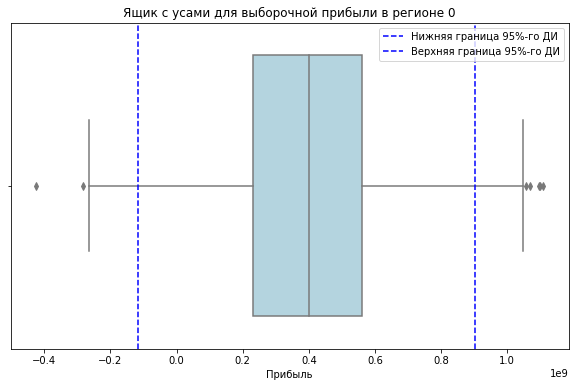

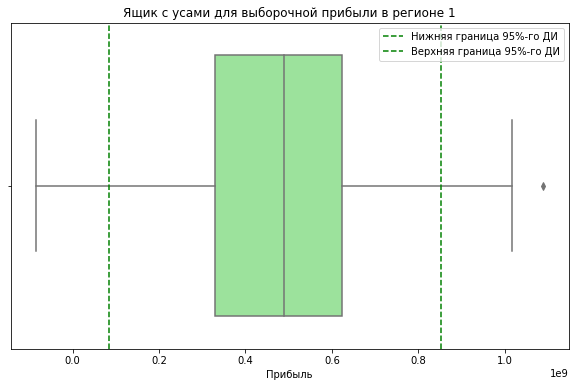

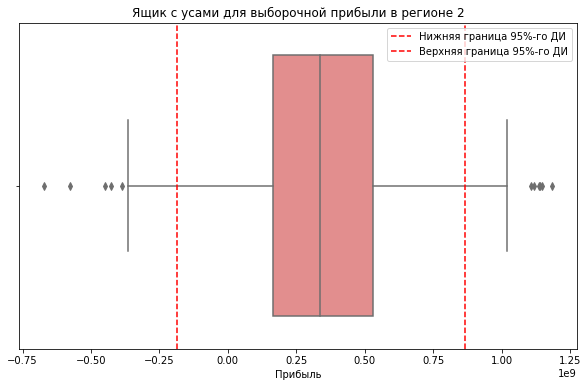

In [76]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=profits_bootstrap_0, color='lightblue')
plt.axvline(confidence_interval_0[0], color='blue', linestyle='--', label='Нижняя граница 95%-го ДИ')
plt.axvline(confidence_interval_0[1], color='blue', linestyle='--', label='Верхняя граница 95%-го ДИ')
plt.xlabel('Прибыль')
plt.title('Ящик с усами для выборочной прибыли в регионе 0')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=profits_bootstrap_1, color='lightgreen')
plt.axvline(confidence_interval_1[0], color='green', linestyle='--', label='Нижняя граница 95%-го ДИ')
plt.axvline(confidence_interval_1[1], color='green', linestyle='--', label='Верхняя граница 95%-го ДИ')
plt.xlabel('Прибыль')
plt.title('Ящик с усами для выборочной прибыли в регионе 1')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=profits_bootstrap_2, color='lightcoral')
plt.axvline(confidence_interval_2[0], color='red', linestyle='--', label='Нижняя граница 95%-го ДИ')
plt.axvline(confidence_interval_2[1], color='red', linestyle='--', label='Верхняя граница 95%-го ДИ')
plt.xlabel('Прибыль')
plt.title('Ящик с усами для выборочной прибыли в регионе 2')
plt.legend()
plt.show()

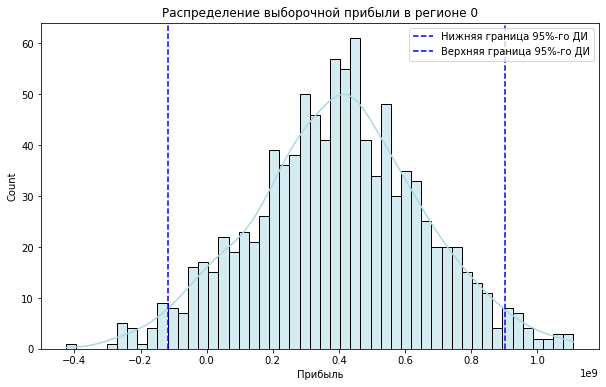

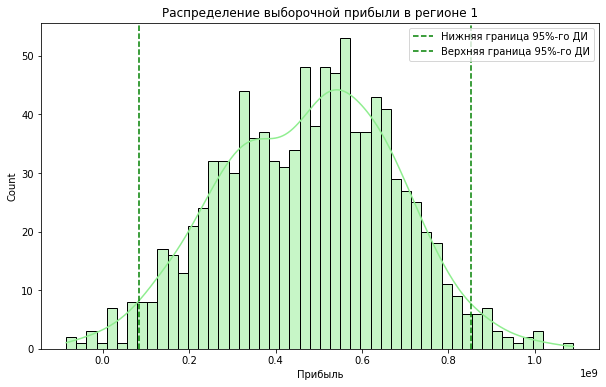

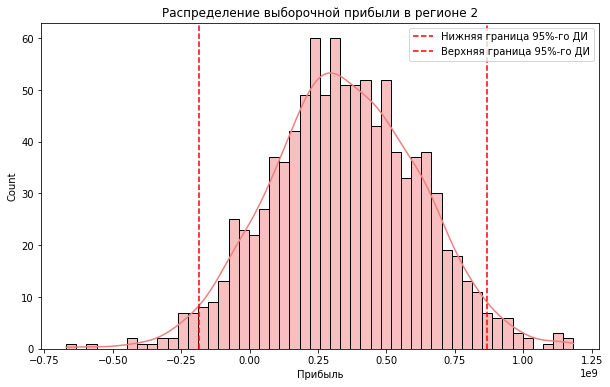

In [77]:
plt.figure(figsize=(10, 6))
sns.histplot(profits_bootstrap_0, bins=50, color='lightblue', kde=True)
plt.axvline(confidence_interval_0[0], color='blue', linestyle='--', label='Нижняя граница 95%-го ДИ')
plt.axvline(confidence_interval_0[1], color='blue', linestyle='--', label='Верхняя граница 95%-го ДИ')
plt.xlabel('Прибыль')
plt.title('Распределение выборочной прибыли в регионе 0')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(profits_bootstrap_1, bins=50, color='lightgreen', kde=True)
plt.axvline(confidence_interval_1[0], color='green', linestyle='--', label='Нижняя граница 95%-го ДИ')
plt.axvline(confidence_interval_1[1], color='green', linestyle='--', label='Верхняя граница 95%-го ДИ')
plt.xlabel('Прибыль')
plt.title('Распределение выборочной прибыли в регионе 1')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(profits_bootstrap_2, bins=50, color='lightcoral', kde=True)
plt.axvline(confidence_interval_2[0], color='red', linestyle='--', label='Нижняя граница 95%-го ДИ')
plt.axvline(confidence_interval_2[1], color='red', linestyle='--', label='Верхняя граница 95%-го ДИ')
plt.xlabel('Прибыль')
plt.title('Распределение выборочной прибыли в регионе 2')
plt.legend()
plt.show()

**<p style="text-align: center;">Общий вывод</p>**

Проведя исследование,предполагается выбрать регион 2 для разработки месторождения на основании следующих обоснований:

- Средняя прибыль в регионе 2 оказалась выше, чем в других регионах. Это указывает на потенциал для получения более высокой прибыли от разработки скважин.

- Риск убытков в регионе 2 составляет 0%. Это говорит о стабильности и надежности инвестиций в этот регион, что является важным фактором для принятия решения о разработке месторождения.

- Хотя доверительный интервал для прибыли в регионе 2 также широкий, что указывает на неопределенность, он охватывает значительный диапазон положительных значений. Это говорит о потенциальной возможности получения высокой прибыли при успешной разработке скважин.

На основе имеющихся данных, регион 2 представляется перспективным для дальнейшего исследования и оценки.

В итоге, регион 2 обладает высоким потенциалом для разработки месторождения на основе средней прибыли, низкого риска убытков и широкого доверительного интервала положительных значений прибыли.